# 2.3 & 3.3

In [ ]:
# Function that creates a subgraph starting from a list of heroes

import itertools
import networkx as nx

def get_subgraph_with(graph: nx.Graph, heroes: iter):

    """Gets a subgraph of the given graph with the heroes and their neighbours.
    :arg
    graph (nx.Graph) - a networkx graph consisting of heroes that are connected to comics.
    heroes (iter) - an iterable of heroes that should be included in the subgraph.
    :return
    a networkx graph that is a subgraph of the given graph with all the provided heroes and the comics they appear in.
    """
    
    comics = list(itertools.chain(*set(graph.neighbors(hero) for hero in heroes)))
    subgraph = graph.subgraph(heroes + comics)
    return subgraph

In [ ]:
# Load the data:

import numpy as np
import pandas as pd


hero_comic = pd.read_csv('/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv')
nodes = pd.read_csv('/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', names = ['node', 'type'])

comics = np.array(nodes[nodes.type == 'comic'].node)


# Graphs

from backend import graph
g_hero_net, graph_type = graph.collaborative.create_from(data='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/hero-network.csv')

g_comics, graph_type = graph.hero_comic.create_from(nodes='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', edges='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv') # here we have the connections between heroes and comics.


In [ ]:
# Function to get the top N herores

top_heroes = pd.DataFrame(hero_comic.groupby(['hero'])['hero'].count()).rename(columns={'hero':'Total_Appearances'}).sort_values('Total_Appearances', ascending = False)
top_heroes

# We create the function top_N:
def top_N(data, N):
    return data[0:N-1]

top_N(top_heroes, 50)

,Total_Appearances
hero,
SPIDER-MAN/PETER PARKER,1577
CAPTAIN AMERICA,1334
IRON MAN/TONY STARK,1150
THING/BENJAMIN J. GR,963
THOR/DR. DONALD BLAK,956
HUMAN TORCH/JOHNNY S,886
MR. FANTASTIC/REED R,854
HULK/DR. ROBERT BRUC,835
WOLVERINE/LOGAN,819


In [ ]:
# Functionality 3:

def shortest_order_route(graph: nx.Graph, N: int, initial_hero, final_hero, superheroes: list):  # 
     
     # First of all, we initialize the list which will contain the shortes path
     path = []

     # Second, we have to focus on the top N nodes in the graph.
     # To do it, we first remove the nodes (and the edges, of course) that are not in the top-N nodes
     
     subg = get_subgraph_with(graph, list(top_N(top_heroes, N).index))

     # Now we want to create a list containing all the superheroes we have to visit, inlcluding the starting one and the ending one
     superheroes.insert(0, initial_hero)
     superheroes.append(final_hero)

     
     # Now, we compute the shortest path between the first and the second, then between the second and the third, and so on,
     # until we visit (in order) all the nodes contained in the original list given as input
     for h in range(len(superheroes) - 1):
          try:
               if superheroes[h] not in subg.nodes():
                    return('WARNING: this here is not in the graph! Try to change N or check if the spelling is correct')

               a = nx.bidirectional_shortest_path(subg, superheroes[h], superheroes[h+1])
               path.append(a)     
               
          except:
               print('Sorry, there is no such path...') 
               return   

     return(path)



In [ ]:
shortest_path = shortest_order_route(g_comics, 42, 'SPIDER-MAN/PETER PARKER', 'CYCLOPS/SCOTT SUMMER', ["BLACK WIDOW/NATASHA",'CAPTAIN AMERICA', 'HUMAN TORCH/JOHNNY S', 'HULK/DR. ROBERT BRUC'])
shortest_path

[['SPIDER-MAN/PETER PARKER', 'A 221', 'BLACK WIDOW/NATASHA'],
 ['BLACK WIDOW/NATASHA', 'A 111', 'CAPTAIN AMERICA'],
 ['CAPTAIN AMERICA', 'A 1', 'HUMAN TORCH/JOHNNY S'],
 ['HUMAN TORCH/JOHNNY S', 'A 1', 'HULK/DR. ROBERT BRUC'],
 ['HULK/DR. ROBERT BRUC', 'A 3', 'CYCLOPS/SCOTT SUMMER']]

# Functionality 3.3

### 3.3.1

In [ ]:
nodes_path = []

for p in shortest_path:
    nodes_path.append(p[1])

print('The shortest path in terms of comics is:', nodes_path)

The shortest path in terms of comics is: ['A 221', 'A 111', 'A 1', 'A 1', 'A 3']


### 3.3.2

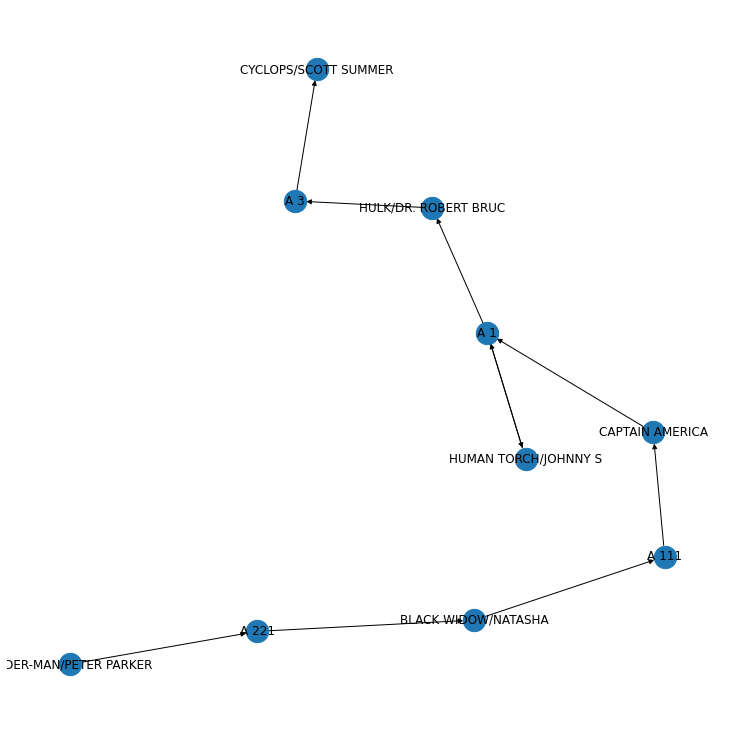

<Figure size 504x504 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# create a directed graph
G = nx.DiGraph()

# add edges to the graph
for path in shortest_path:
    for i in range(len(path)-1):
        G.add_edge(path[i], path[i+1])


# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size = 500)


# show the plot
plt.figure(figsize = (7, 7))
plt.show()